In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mysql.connector
import Console_App.data_loader as dl

In [2]:
with open(r"C:\Users\izumr\Desktop\Work\data-eng-project\Console_App\hidden.txt", 'r') as f:
    hidden_ls = f.readlines()
    usr = hidden_ls[0][:-1]
    pwd = hidden_ls[1]
    f.close()

In [3]:
connection = mysql.connector.connect(host='localhost',
                                        database='creditcard_capstone',
                                        user=usr,
                                        password=pwd)
df_transactions = dl.load_table(connection, 'cdw_sapp_credit_card')

In [4]:
df_transactions.head()

,BRANCH_CODE,CREDIT_CARD_NO,CUST_SSN,TRANSACTION_ID,TRANSACTION_TYPE,TRANSACTION_VALUE,TIMEID
0,114,4210653349028689,123459988,1,Education,78.90,20180214
1,35,4210653349028689,123459988,2,Entertainment,14.24,20180320
2,160,4210653349028689,123459988,3,Grocery,56.70,20180708
3,114,4210653349028689,123459988,4,Entertainment,59.73,20180419
4,93,4210653349028689,123459988,5,Gas,3.59,20181010


In [5]:
df_by_type = df_transactions.groupby(['TRANSACTION_TYPE'])['TRANSACTION_TYPE'].count()
df_by_type_sorted = df_by_type.sort_values()

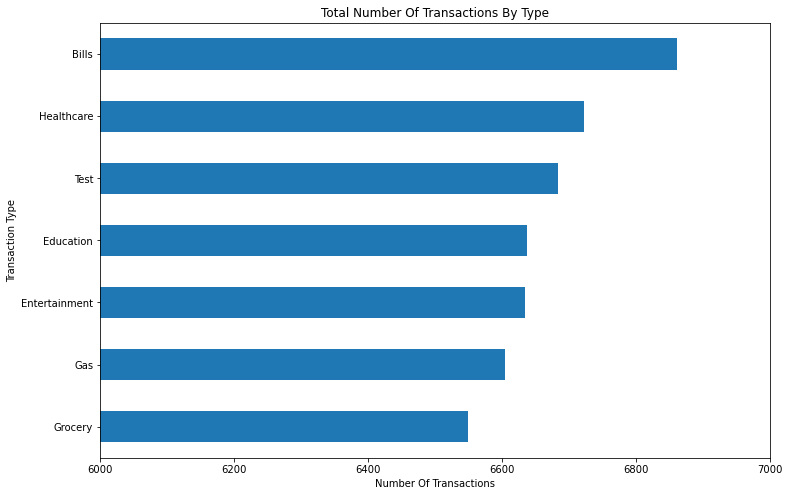

In [6]:
df_by_type_sorted.plot(kind='barh', figsize=[12,8])
plt.title('Total Number Of Transactions By Type')
plt.xlim([6000, 7000])
plt.xlabel('Number Of Transactions')
plt.ylabel('Transaction Type')
plt.show()

In [7]:
connection = mysql.connector.connect(host='localhost',
                                        database='creditcard_capstone',
                                        user=usr,
                                        password=pwd)
df_customers = dl.load_table(connection, 'cdw_sapp_customer')
df_customers.head()

,CREDIT_CARD_NO,CUST_CITY,CUST_COUNTRY,CUST_EMAIL,CUST_PHONE,CUST_STATE,CUST_ZIP,FIRST_NAME,LAST_NAME,LAST_UPDATED,MIDDLE_NAME,SSN,FULL_STREET_ADDRESS
0,4210653344660822,Chambersburg,United States,MCamp@example.com,(777)124-1782,PA,17201,MARCEL,CAMP,2018-04-21T12:49:02.000-04:00,andreas,123451007,"College Avenue,762"
1,4210653375981317,SanLorenzo,United States,SFields@example.com,(777)123-4687,CA,94580,STACEY,FIELDS,2018-04-21T12:49:02.000-04:00,garfield,123451012,"Sycamore Drive,419"
2,4210653316827505,Carrollton,United States,OFinn@example.com,(777)124-3309,GA,30117,OREN,FINN,2018-04-21T12:49:02.000-04:00,bernadette,123451037,"Winding Way,389"
3,4210653352152800,Reidsville,United States,ILane@example.com,(777)123-7396,NC,27320,IKE,LANE,2018-04-21T12:49:02.000-04:00,logan,123451041,"Henry Street,489"
4,4210653312588692,Rowlett,United States,TRichards@example.com,(777)123-6077,TX,75088,TRACEY,RICHARDS,2018-04-21T12:49:02.000-04:00,austin,123451068,"Durham Road,147"


Text(0, 0.5, 'State')

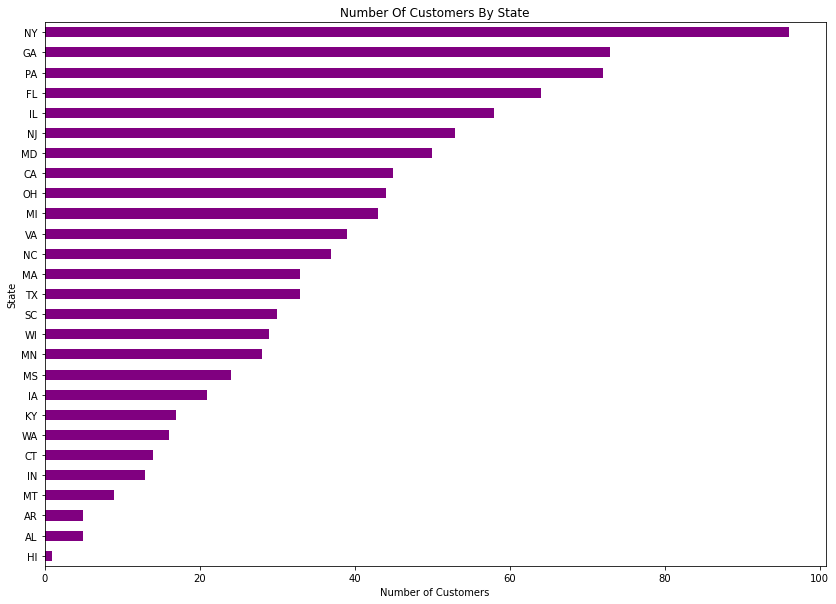

In [8]:
df_by_state = df_customers.groupby(['CUST_STATE'])['SSN'].count()
df_by_state.sort_values().plot(kind='barh', figsize=[14,10], color='purple')
plt.title('Number Of Customers By State')
plt.xlabel('Number of Customers')
plt.ylabel('State')

Text(0, 0.5, 'Customer SSN')

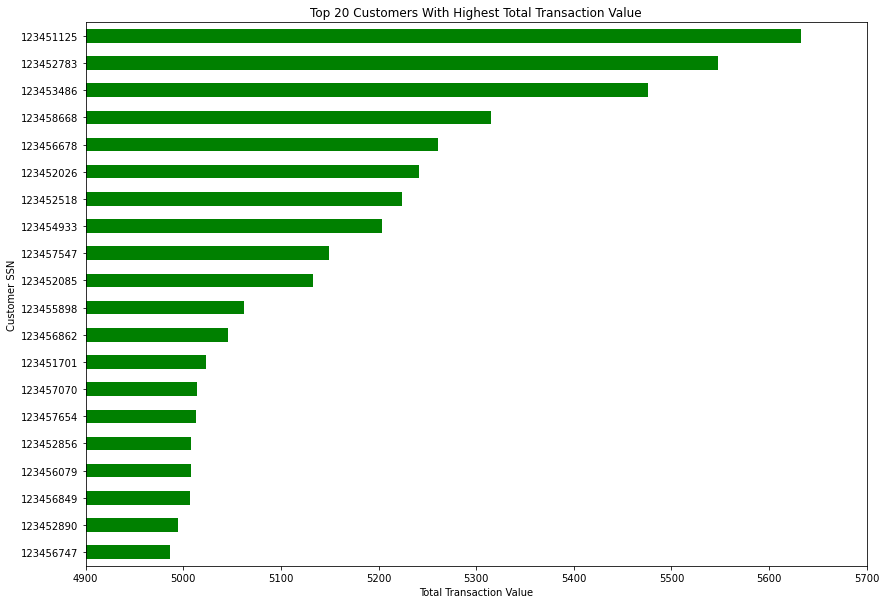

In [9]:
df_transaction_sum = df_transactions.groupby(['CUST_SSN'])['TRANSACTION_VALUE'].sum()
top20customers = df_transaction_sum.sort_values().tail(20)
top20customers.plot(kind='barh',figsize=[14,10], color = 'g')
plt.xlim([4900, 5700])
plt.title('Top 20 Customers With Highest Total Transaction Value')
plt.xlabel('Total Transaction Value')
plt.ylabel('Customer SSN')

In [10]:
df_transactions['YEAR_MONTH']= df_transactions['TIMEID'].map(lambda x:x[:6])
df_transactions.head()

,BRANCH_CODE,CREDIT_CARD_NO,CUST_SSN,TRANSACTION_ID,TRANSACTION_TYPE,TRANSACTION_VALUE,TIMEID,YEAR_MONTH
0,114,4210653349028689,123459988,1,Education,78.90,20180214,201802
1,35,4210653349028689,123459988,2,Entertainment,14.24,20180320,201803
2,160,4210653349028689,123459988,3,Grocery,56.70,20180708,201807
3,114,4210653349028689,123459988,4,Entertainment,59.73,20180419,201804
4,93,4210653349028689,123459988,5,Gas,3.59,20181010,201810


In [27]:
df_all_months = df_transactions.groupby(['YEAR_MONTH'])['TRANSACTION_ID'].count().to_frame()
df_all_months.head()

,TRANSACTION_ID
YEAR_MONTH,
201801,3814
201802,3959
201803,3851
201804,3840
201805,3946


In [28]:
df_all_months.sort_values(by='TRANSACTION_ID', ascending=False, inplace=True)
df_top3 = df_all_months.head(3)
df_top3

,TRANSACTION_ID
YEAR_MONTH,
201802,3959
201805,3946
201810,3946


Text(0, 0.5, 'Year and Month')

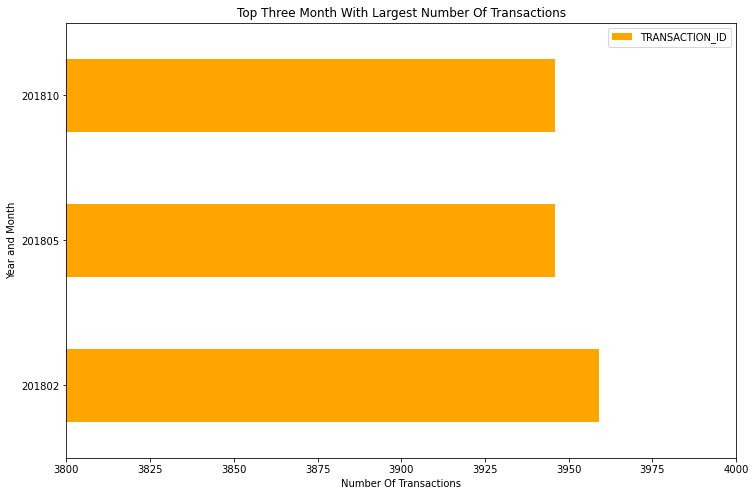

In [32]:
df_top3.plot(kind='barh', figsize=[12,8], color='orange')
plt.xlim([3800,4000])
plt.title('Top Three Month With Largest Number Of Transactions')
plt.xlabel('Number Of Transactions')
plt.ylabel('Year and Month')

In [69]:
df_transaction_health = df_transactions.loc[df_transactions['TRANSACTION_TYPE']=='Healthcare']
df_health = df_transaction_health.groupby(['BRANCH_CODE'])['TRANSACTION_VALUE'].sum()
df_health_top20 = df_health.head(20)

Text(0, 0.5, 'Branch Code')

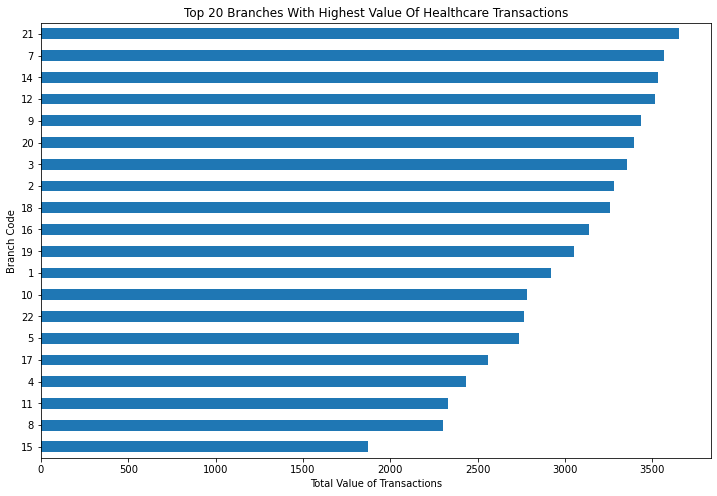

In [73]:
df_health_top20.sort_values().plot(kind='barh', figsize=[12,8])
plt.title('Top 20 Branches With Highest Value Of Healthcare Transactions')
plt.xlabel('Total Value of Transactions')
plt.ylabel('Branch Code')